## PCA

We will use some datasets to show the power of PCA.

* iris
* 8x8 mnist
* Network Intrusion Detection using Python

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

## Iris

It is the normal iris dataset.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


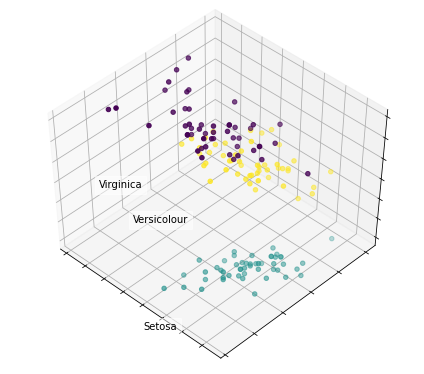

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Change the order of labels, so that they match
y_clr = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_clr)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

Let's try PCA to reduce the dimension of iris data. First, we randomly split the iris dataset into two datasets, one for training (70%) and one for testing (30%).

In [ ]:
from sklearn.model_selection import train_test_split

# Train, test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

### Question #1:
Try to use a decision tree to train the traing dataset. How to find the best max_depth of the tree?

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree with max_depth = 2
iris_dt = DecisionTreeClassifier(max_depth = 2)
iris_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

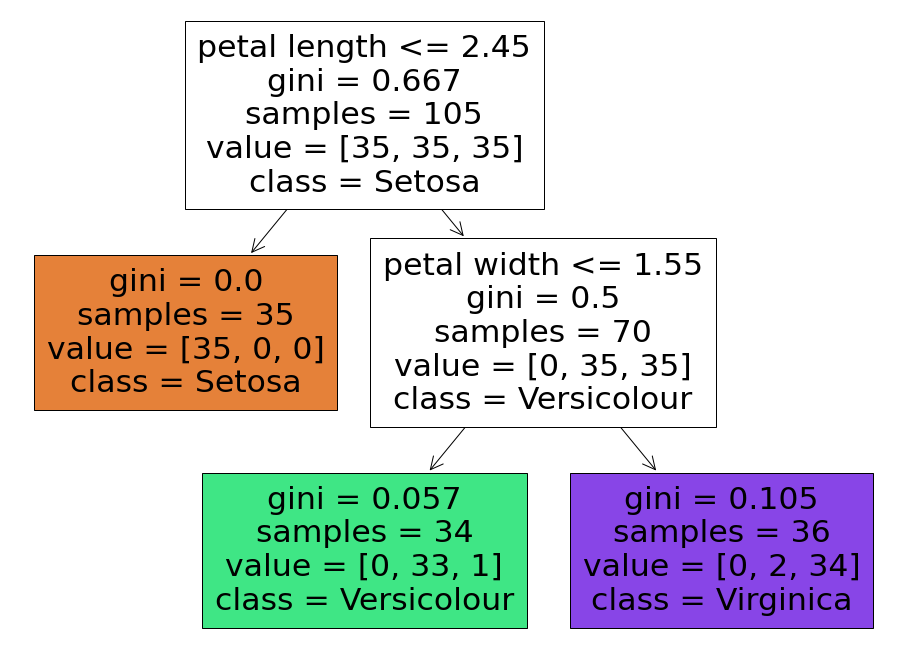

In [ ]:
from sklearn import tree

plt.figure(figsize = (16, 12))
tree.plot_tree(iris_dt,
               feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width'],
               class_names = ['Setosa', 'Versicolour', 'Virginica'],
               filled = True)
plt.show()

# !!! left child node is "Setosa", middle node is "Versicolour", and  right node is "Virginica" !!!

In [ ]:
# accuracy of training data
training_acc = round(iris_dt.score(X_train, y_train) * 100, 5)
print('Training accuracy:', training_acc)

Training accuracy: 97.14286


### Question #2:

Predict the testing data. What is your accuracy_score?

In [ ]:
# Predicting results for test dataset
iris_y_pred = iris_dt.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

# accuracy of testing data
testing_acc = round(accuracy_score(y_test, iris_y_pred, normalize=True, sample_weight=None), 5)
print('Testing accuracy:', testing_acc)

Testing accuracy: 0.88889


### Question #3:

Try to use PCA to reduce the dimensionality to 2. Use the entire iris dataset. (DO NOT use training/testing data.) Plot 2-d figure with PCA data and their labels.

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

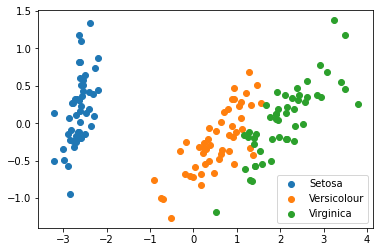

In [ ]:
x_se = X_pca[0:50, 0]
y_se = X_pca[0:50, 1]
plt.scatter(x_se, y_se, label = 'Setosa')

x_ver = X_pca[50:100, 0]
y_ver = X_pca[50:100, 1]
plt.scatter(x_ver, y_ver, label = 'Versicolour')

x_vir = X_pca[100:150, 0]
y_vir = X_pca[100:150, 1]
plt.scatter(x_vir, y_vir, label = 'Virginica')

plt.legend()
plt.show()

### Question #4:

Now, split the PCA data into two datasets (training 70%, testing 30%) and build a decision tree. What is the result? 

In [ ]:
# Train, test splits
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

In [ ]:
# Create Decision Tree with max_depth = 2
iris_pca_dt = DecisionTreeClassifier(max_depth = 2)
iris_pca_dt.fit(X_pca_train, y_pca_train)

DecisionTreeClassifier(max_depth=2)

In [ ]:
# accuracy of training data
pca_training_acc = round(iris_pca_dt.score(X_pca_train, y_pca_train) * 100, 5)
print('Training accuracy:', pca_training_acc)

Training accuracy: 95.2381


In [ ]:
# Predicting results for test dataset
iris_pca_y_pred = iris_pca_dt.predict(X_pca_test)

In [ ]:
# accuracy of testing data
pca_testing_acc = round(accuracy_score(y_pca_test, iris_pca_y_pred, normalize=True, sample_weight=None), 5)
print('Testing accuracy:', pca_testing_acc)

Testing accuracy: 0.91111


### Question #5:

Is the accuracy higher? Why? Please give us a reasonable explaination.  

Yes. The accuracy is higher. I think the reason is that PCA decompose well on the data of Versicolour and Virginica.

### Question #6:

How do you even get a higher accuracy rate? It is an open question, and try your best.

Hint: PCA parameters, data preprocessing and feature engineering.

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

from sklearn import decomposition

pca1 = decomposition.PCA(n_components=4)
pca1.fit(X)
X_pca1 = pca1.transform(X)

In [ ]:
# Train, test splits
X_pca1_train, X_pca1_test, y_pca1_train, y_pca1_test = train_test_split(X_pca1, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

In [ ]:
# Create Decision Tree with max_depth = 3
iris_pca1_dt = DecisionTreeClassifier(max_depth = 3)
iris_pca1_dt.fit(X_pca1_train, y_pca1_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
# accuracy of training data
pca1_training_acc = round(iris_pca1_dt.score(X_pca1_train, y_pca1_train) * 100, 5)
print('Training accuracy:', pca1_training_acc)

Training accuracy: 95.2381


In [ ]:
# Predicting results for test dataset
iris_pca1_y_pred = iris_pca1_dt.predict(X_pca1_test)

In [ ]:
# accuracy of testing data
pca1_testing_acc = round(accuracy_score(y_pca1_test, iris_pca1_y_pred, normalize=True, sample_weight=None), 5)
print('Testing accuracy:', pca1_testing_acc)

Testing accuracy: 0.91111


## MNIST

Let's look at a famous handwritten numbers dataset.

In [ ]:
digits = datasets.load_digits()
digi_X = digits.data
digi_y = digits.target

In [ ]:
digi_y

array([0, 1, 2, ..., 8, 9, 8])

Each data sample has 64 features that represent a 8*8 grid. Each feature is a real number (0.0, 1.0), while 1 is white and 0 is black. Here are some examples.

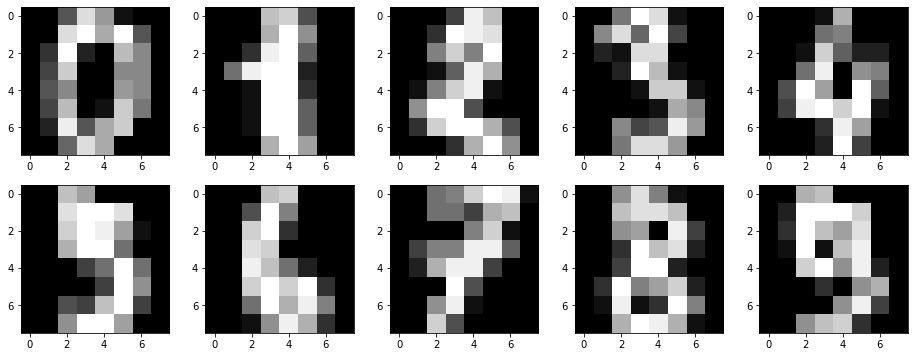

In [ ]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digi_X[i,:].reshape([8,8]), cmap='gray');

### Question #7:

Try to use PCA to reduce the MNIST data to 2-dimension, and plot the 2-d figure with labels.

In [ ]:
mnist_pca = decomposition.PCA(n_components=2)
mnist_pca.fit(digi_X)
mnist_X_pca = mnist_pca.transform(digi_X)
# len(mnist_X_pca)
mnist_X_pca[0, 0]
# digi_y[0]

-1.2594662427322716

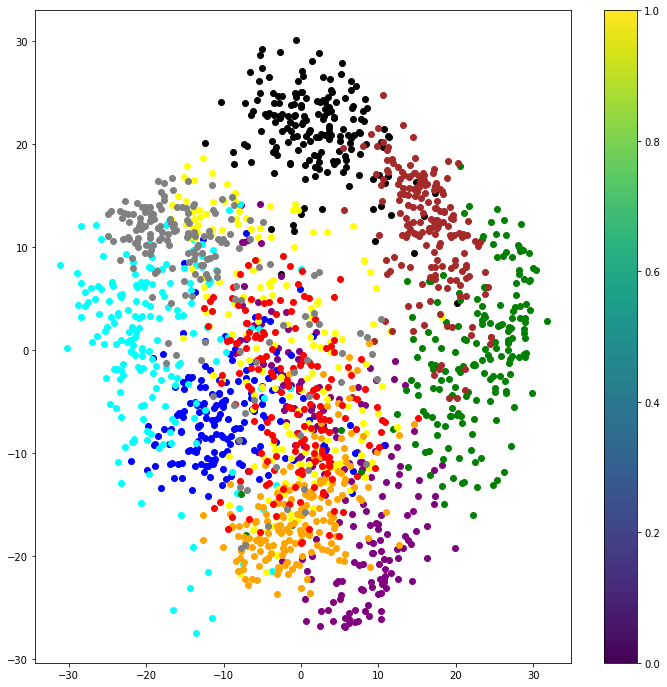

In [ ]:
df = pd.DataFrame(mnist_X_pca, columns = ["x1","x2"])

colors = ['black', 'purple', 'blue', 'cyan', 'green', 'yellow', 'brown', 'orange', 'red', 'gray']

plt.figure(figsize = (12, 12))

for index in range(10):
    x1 = df.loc[digi_y == index]["x1"]
    x2 = df.loc[digi_y == index]["x2"]
    plt.scatter(x1, x2, c=colors[index], alpha=1, norm=[index])
    
plt.colorbar()

### Question #8:

Why the figure looks bad? How many components would be better?

I think the reason is that the total explained variance is too small when there are only two components. I suggest there should be at least five components to increase the total explained variance.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

mnist_pca1 = PCA()
T = mnist_pca1.fit_transform(StandardScaler().fit_transform(digi_X))

print(mnist_pca1.explained_variance_ratio_)

[1.20339161e-01 9.56105440e-02 8.44441489e-02 6.49840791e-02
 4.86015488e-02 4.21411987e-02 3.94208280e-02 3.38938092e-02
 2.99822101e-02 2.93200255e-02 2.78180546e-02 2.57705509e-02
 2.27530332e-02 2.22717974e-02 2.16522943e-02 1.91416661e-02
 1.77554709e-02 1.63806927e-02 1.59646017e-02 1.48919119e-02
 1.34796957e-02 1.27193137e-02 1.16583735e-02 1.05764660e-02
 9.75315947e-03 9.44558990e-03 8.63013827e-03 8.36642854e-03
 7.97693248e-03 7.46471371e-03 7.25582151e-03 6.91911245e-03
 6.53908536e-03 6.40792574e-03 5.91384112e-03 5.71162405e-03
 5.23636803e-03 4.81807586e-03 4.53719260e-03 4.23162753e-03
 4.06053070e-03 3.97084808e-03 3.56493303e-03 3.40787181e-03
 3.27835335e-03 3.11032007e-03 2.88575294e-03 2.76489264e-03
 2.59174941e-03 2.34483006e-03 2.18256858e-03 2.03597635e-03
 1.95512426e-03 1.83318499e-03 1.67946387e-03 1.61236062e-03
 1.47762694e-03 1.35118411e-03 1.25100742e-03 1.03695730e-03
 8.25350945e-04 3.23475858e-33 6.39352227e-34 6.29595280e-34]


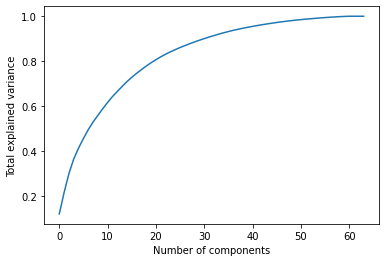

In [ ]:
x = []
y = []
for idx, val in enumerate(mnist_pca1.explained_variance_ratio_):
  # print('idx, val', idx, val)
  x.append(idx)
  if idx > 0:
    y.append(val + y[idx - 1])
  else:
    y.append(val)
plt.plot(x, y)
plt.xlabel("Number of components")
plt.ylabel("Total explained variance")
plt.show()

### Bonus #1:

Try another technique for dimension reduction named "TSNE". Take a look at TSNE's document. Could you explain why TSNE is better?

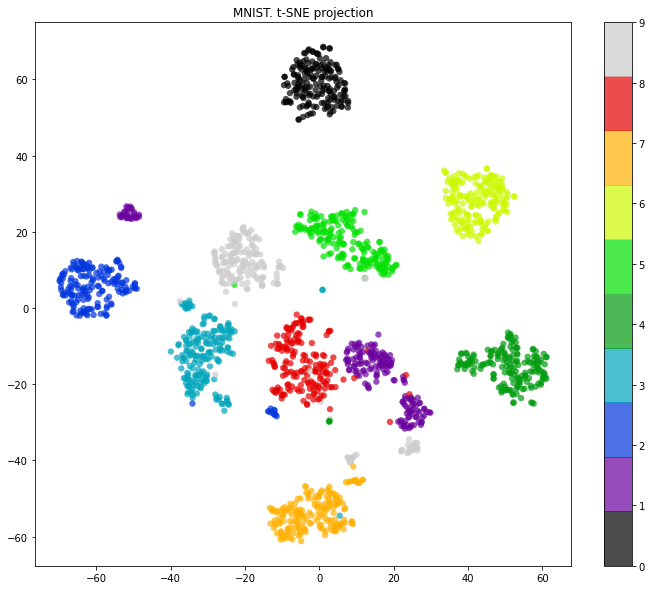

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
from sklearn.manifold import TSNE

## Hierarchical Clustering

Here is an example of Hierarchical Clustering.

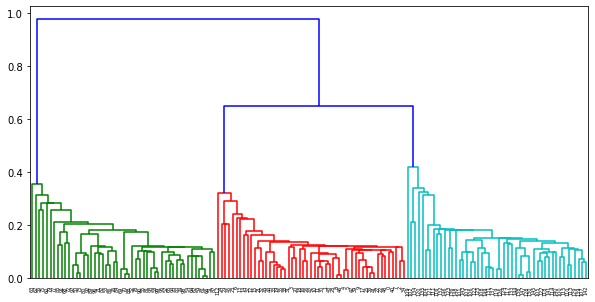

In [ ]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

h_X = np.zeros((150, 2))

np.random.seed(seed=42)
h_X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
h_X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

h_X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
h_X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

h_X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
h_X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

distance_mat = pdist(h_X) # pdist calculates the uxpper triangle of the distance matrix

Z = hierarchy.linkage(distance_mat, 'single') # linkage is agglomerative clustering algorithm
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

#### Question #9:

Try to cluster iris data using the above codes. Show misclustered data points.

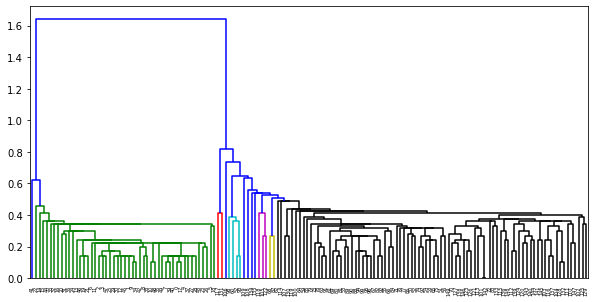

In [ ]:
iris_distance_mat = pdist(X) # pdist calculates the uxpper triangle of the distance matrix

iris_Z = hierarchy.linkage(iris_distance_mat, 'single') # linkage is agglomerative clustering algorithm
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(iris_Z, color_threshold=0.5)

## Network Intrusion Detection using Python

You have tried NID before. Could you do a better acc rate(by using any techniques you have learned) ?

https://www.kaggle.com/code/sampadab17/network-intrusion-detection-using-python/data

#### Question #10:

Show you result of NID.

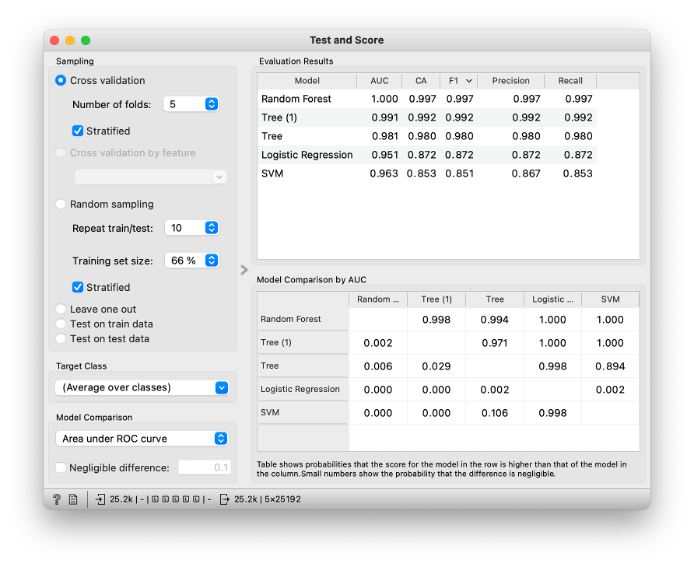

#### Question #11:

Plot a single 2-d figure with clusters of NID labeled training data and non-labeled testing data. Note that testing data has no target and it is in another csv file. (Maybe you can use 'star' symbol to represet non-labeled testing data to make the figure clear to understand.)

In [ ]:
# read csv files to dataframe

nid_train = pd.read_csv('Train.csv')
nid_test = pd.read_csv('Test.csv')

In [ ]:
nid_X_train = nid_train.drop(['Unnamed: 0', 'class'], axis = 1)

In [ ]:
nid_y_train = nid_train['class']

In [ ]:
# Create Decision Tree with max_depth = 2
nid_dt = DecisionTreeClassifier(max_depth = 2)
nid_dt.fit(nid_X_train, nid_y_train)

DecisionTreeClassifier(max_depth=2)

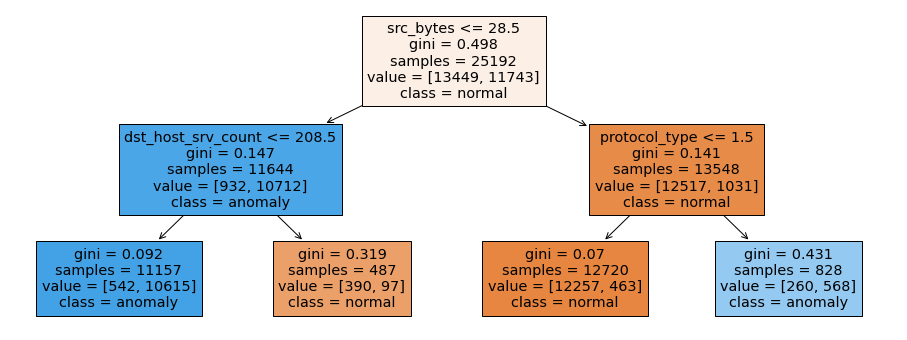

In [ ]:
from sklearn import tree

plt.figure(figsize = (16, 6))
tree.plot_tree(nid_dt,
               feature_names = nid_X_train.columns,
              #  ['sepal length', 'sepal width', 'petal length', 'petal width'],
               class_names = ['normal', 'anomaly'],
               filled = True)
plt.show()

# !!! left child node is "Setosa", middle node is "Versicolour", and  right node is "Virginica" !!!

In [ ]:
# accuracy of training data
nid_training_acc = round(nid_dt.score(nid_X_train, nid_y_train) * 100, 5)
print('Training accuracy:', nid_training_acc)

Training accuracy: 94.59352


In [ ]:
nid_X_test = nid_test.drop(['Unnamed: 0'], axis = 1)

In [ ]:
# Predicting results for test dataset
nid_y_pred = nid_dt.predict(nid_X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- class
Feature names seen at fit time, yet now missing:
- Unnamed: 0

  warnings.warn(message, FutureWarning)


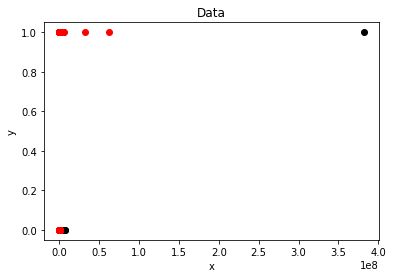

In [ ]:
plt.plot(nid_X_train, nid_y_train, 'ko'); 
plt.plot(nid_X_test, nid_y_pred, 'ro')
plt.xlabel('x'); plt.ylabel('y'); plt.title('Data');

#### Question #12:

Does the testing data points near the training data points? If so, why? If not, why not?

No. Maybe the testing data wasn't collected as the time as training data.